In [1]:
import numpy as np
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
%matplotlib inline
mpl.style.use('seaborn-talk')

In [3]:
def num_balls(data, cutoff):
    
    balls = [data[0]]
    
    for x in data[1:]:
        if not np.isscalar(x) and np.all(np.linalg.norm(x - np.asarray(balls), ord=1, axis=-1) 
                                         > (cutoff / np.sqrt(len(data)))):
            balls.append(x)
        elif np.all(abs(x - np.asarray(balls)) > (cutoff / np.sqrt(len(data)))):
            balls.append(x)
            
    return len(balls)

In [4]:
xvals = np.exp(np.arange(1,12,1)).astype('int')
dim = 1

In [5]:
lengths = [num_balls(stats.multivariate_normal.rvs(size=n, cov=np.eye(dim)), 1) for n in xvals]

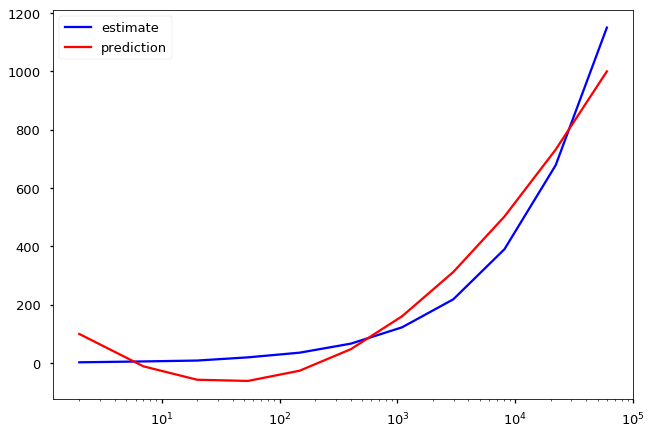

In [6]:
poly = PolynomialFeatures(degree=2*dim)
poly_x = poly.fit_transform(np.log(xvals).reshape(-1,1))
lin_model = linear_model.LinearRegression().fit(poly_x, lengths)
fig, ax = mpl.pyplot.subplots(1,1)
ax.plot(xvals, lengths, color='blue', label='estimate')
ax.plot(xvals, lin_model.predict(poly_x), color='red', label='prediction')
ax.set_xscale('log')
ax.legend()